In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import pprint
pp = pprint.PrettyPrinter(width=41, compact=True)

from tqdm import tqdm_notebook as tqdm

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', df.shape[0]+1)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.model_selection import GridSearchCV

In [93]:
df = pd.read_csv('ready_to_model_just_one')

## predicting popularity

### popularity - linear regression

In [172]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                    'speechiness', 'tempo', 'valence', 'duration', 'key', 'mode', 'time_signature',
         
          'spot_followers',  
       
         'track_longevity', 'peak_rank', 'time']]  # not artist/track/genre/spot_artist_pop

y= df['spotify_track_pop']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Mean cross validated training scores:')
print(np.mean(cross_val_score(linreg, X_train, y_train, cv=5)))
print('Training score:')
print(linreg.score(X_train, y_train))
print('Test score:')
print(linreg.score(X_test, y_test))

Mean cross validated training scores:
0.5746662534564375
Training score:
0.5760938664349784
Test score:
0.5729736198883284


In [174]:
df_coef = pd.DataFrame({'feature': X.columns,'coef': linreg.coef_,'abs_coef': np.abs(linreg.coef_)})
df_coef.sort_values(by='abs_coef', ascending=False)

,feature,coef,abs_coef
16,time,-11.411248,11.411248
15,peak_rank,-5.101219,5.101219
14,track_longevity,3.552898,3.552898
13,spot_followers,2.793421,2.793421
4,liveness,-0.667895,0.667895
5,loudness,0.532260,0.532260
2,energy,-0.439513,0.439513
8,valence,-0.391707,0.391707
6,speechiness,0.306707,0.306707
11,mode,-0.304740,0.304740


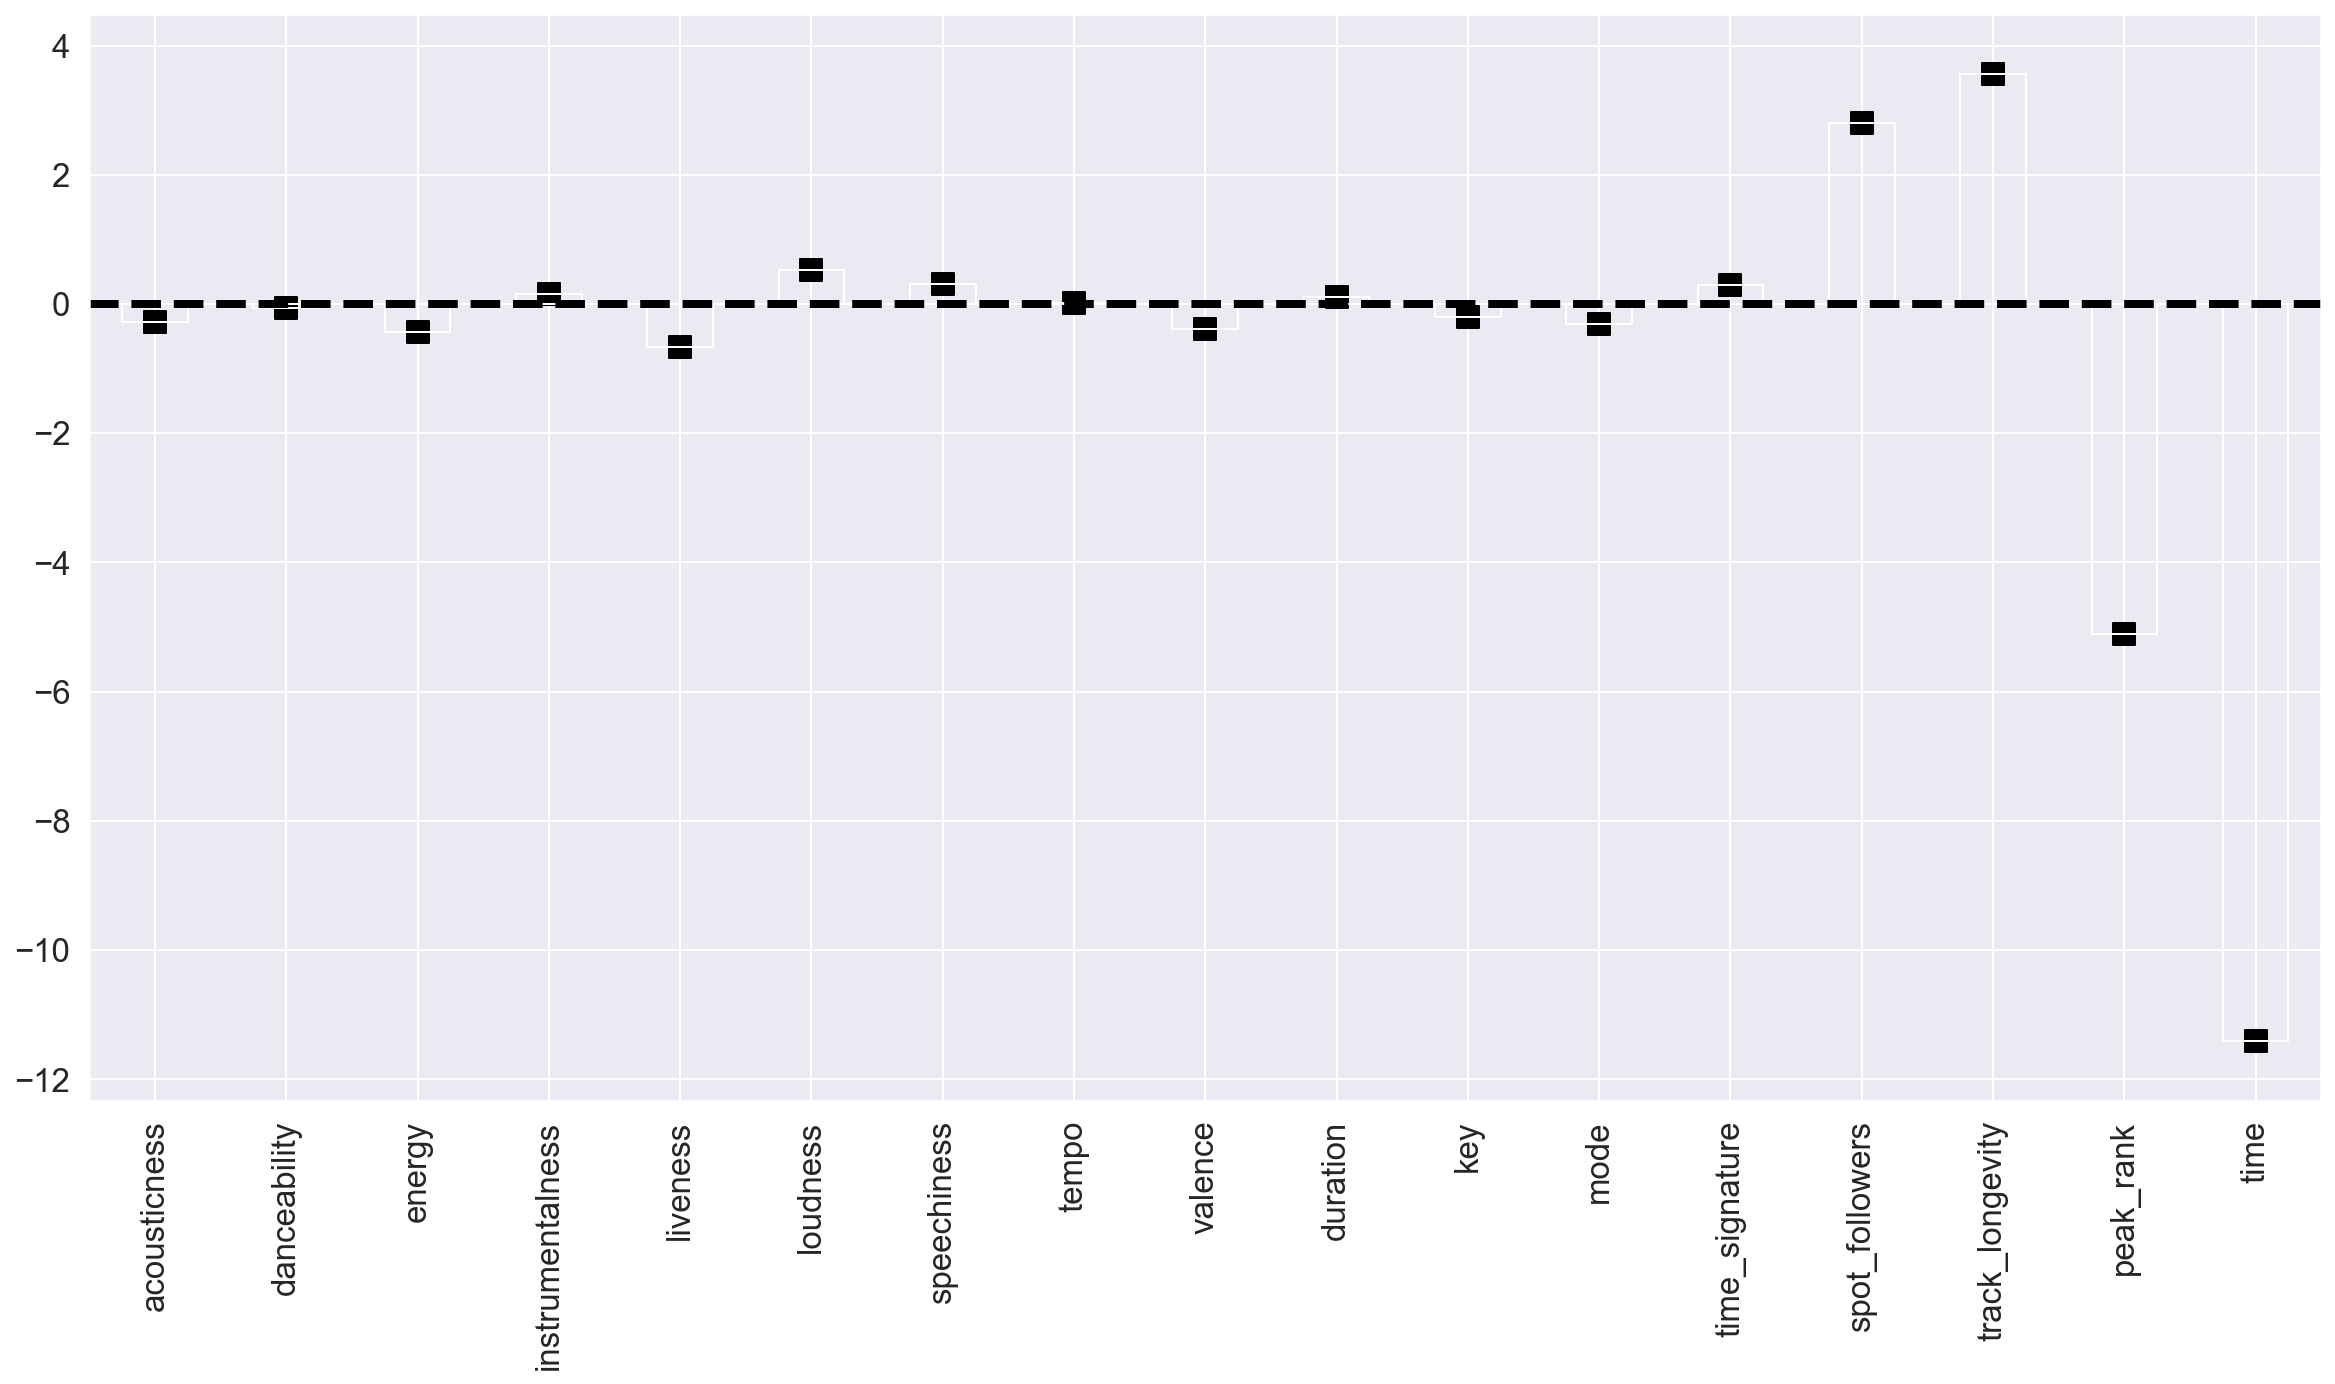

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
df_coef.plot(x='feature', y='coef', kind='bar', 
             ax=ax, color='none', 
              legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(df_coef.shape[0]), 
           marker='s', s=120, 
           y=df_coef['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')

### popularity - elastic net cv

In [151]:
from sklearn.linear_model import ElasticNetCV

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EN = ElasticNetCV(cv=10, l1_ratio=list(np.linspace(0, 1, 100)), alphas=list(np.linspace(-3, 3, 100)), verbose=1)
EN.fit(X_train, y_train)

print('Mean cross validated training scores:')
print(np.mean(cross_val_score(EN, X_train, y_train, cv=5)))
print('Training score:')
print(EN.score(X_train, y_train))
print('Test score:')
print(EN.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Mean cross validated training scores:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.........................................................................................................................................[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...........................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.5753959114498588
Training score:
0.5767421019246186
Test score:
0.573322531174534


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.7min finished


human behavior inherently has much more unexplainable variability, and this produces R2 values that are usually less than 50%. 
question of whether 'billboard familiarity' is a bias estimator



### popularity - random forest

In [124]:
X_rf = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                    'speechiness', 'tempo', 'valence', 'duration', 'key', 'mode', 'time_signature',
         
          'spot_followers', 'peak_rank', 
       
          'artist_familiarity', 'track_longevity', 'time']]       # not artist/track/genre/spot_artist_pop/

y_rf = df['spotify_track_pop']

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)
print('Mean cross validated training scores:')
print(np.mean(cross_val_score(rf, X_train, y_train, cv=5)))
print('Training score:')
print(rf.score(X_train, y_train))
print('Test score:')
print(rf.score(X_test, y_test))

Mean cross validated training scores:
0.7279768734889478
Training score:
0.963234024936655
Test score:
0.7208291629087069


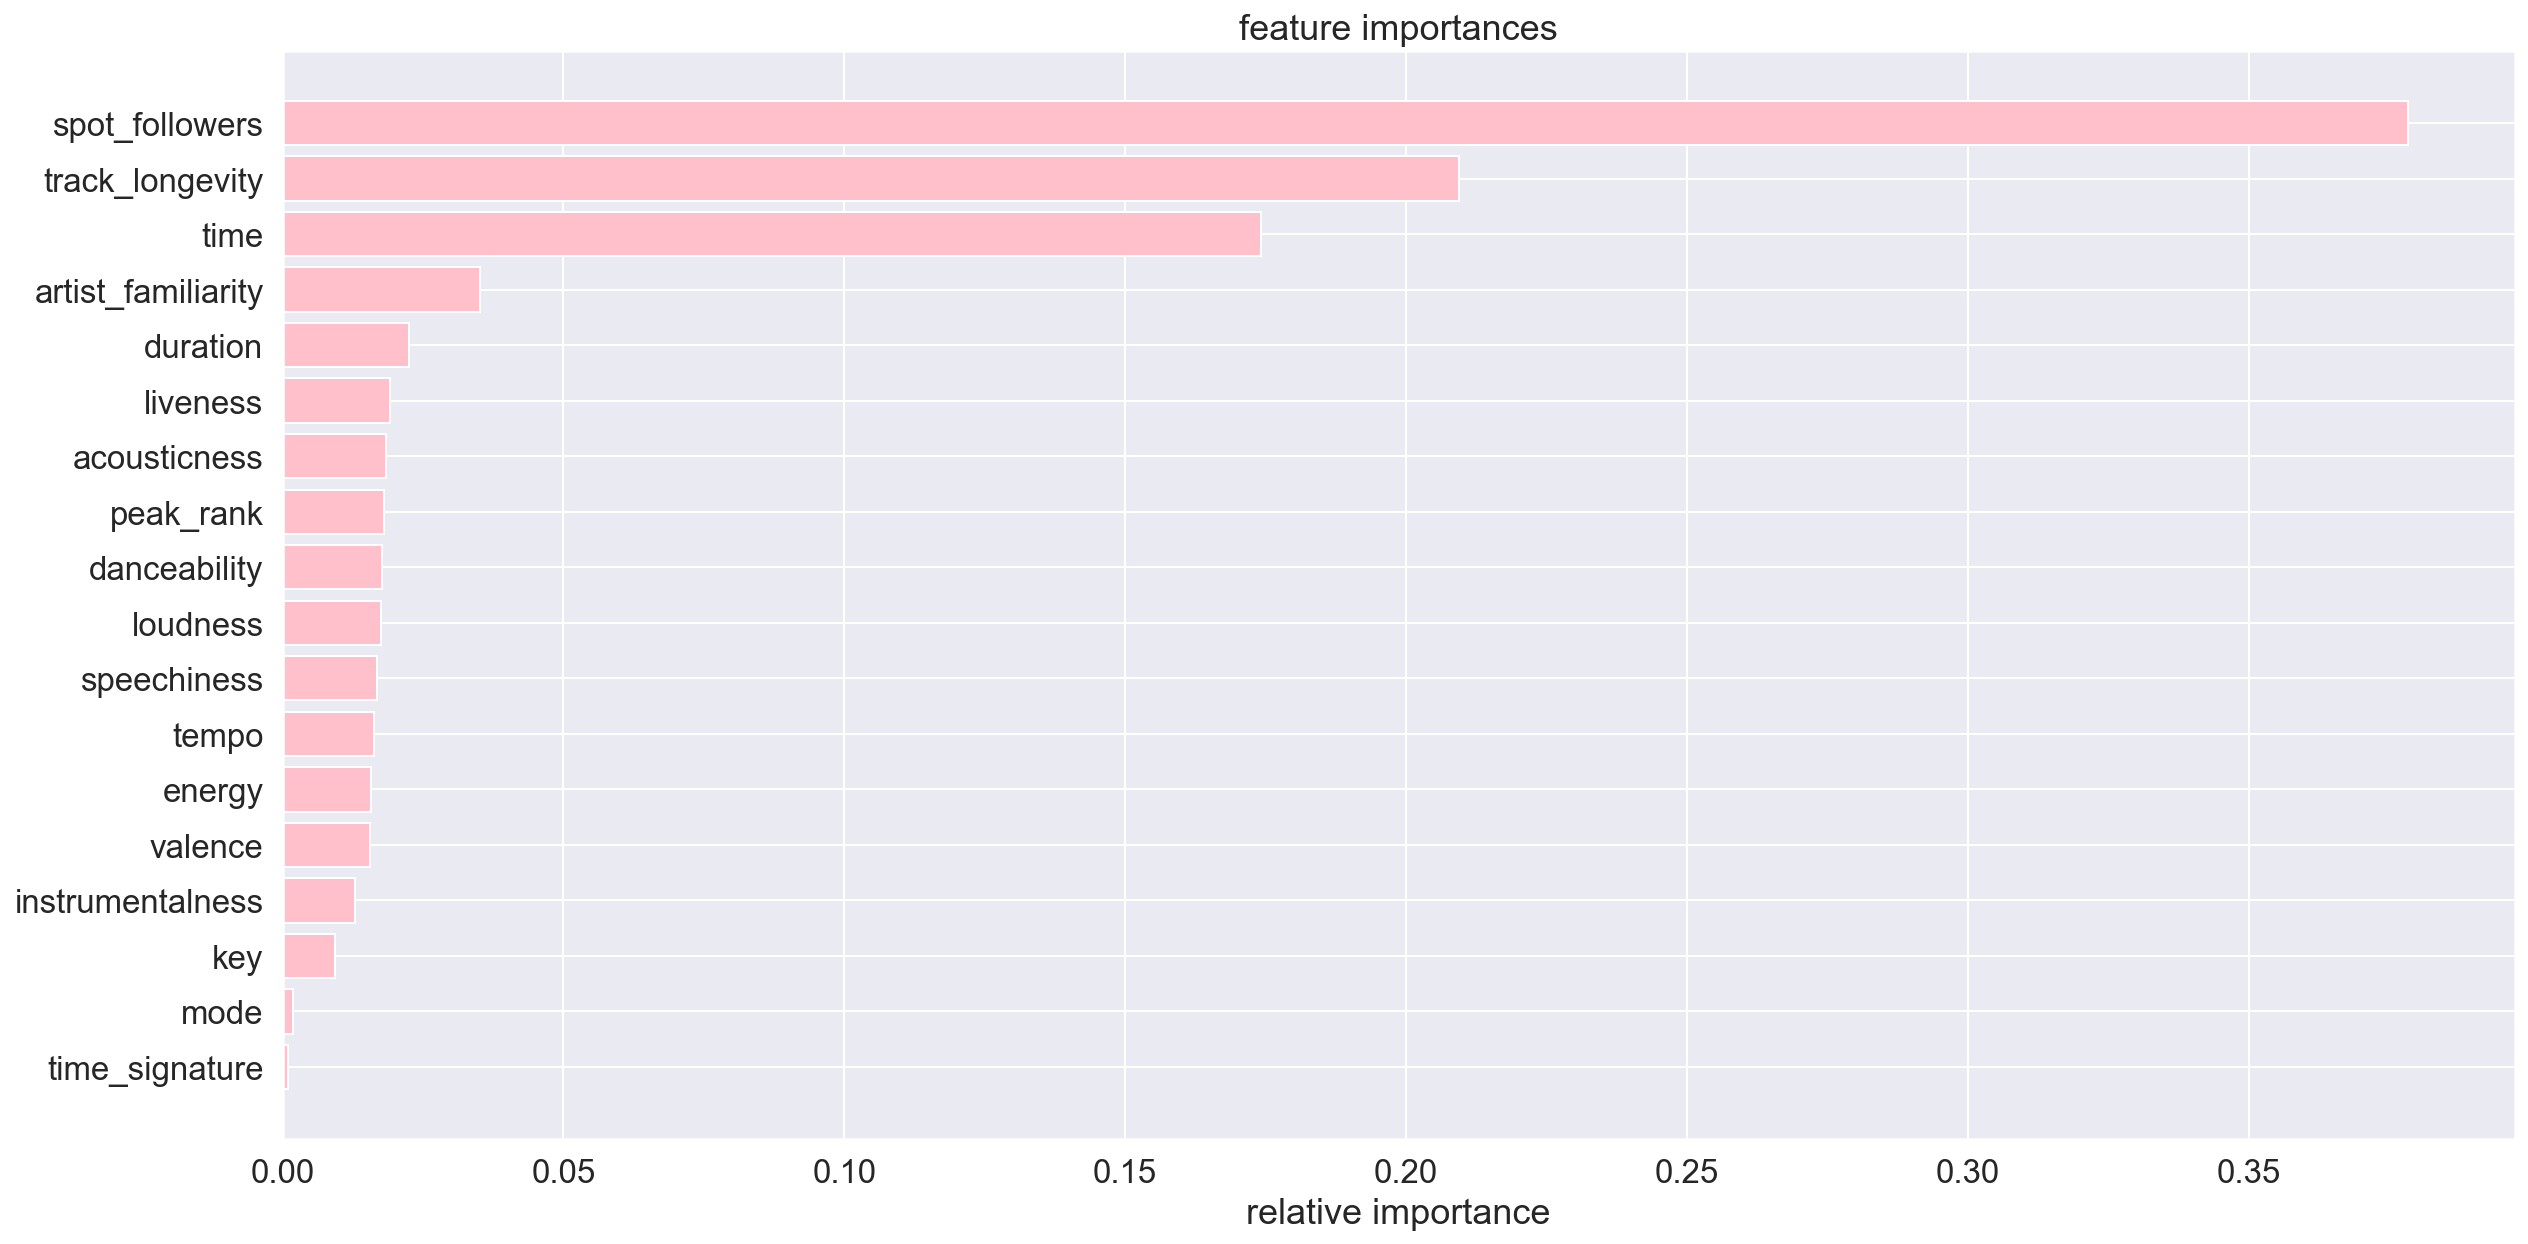

In [128]:
features = X_rf.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('feature importances')
plt.barh(range(len(indices)), importances[indices], align='center', color='pink')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('relative importance')
plt.show()

In [182]:
rf_df = pd.DataFrame({'feature': features,'coef': importances,'abs_coef': np.abs(importances)})
rf_df.sort_values(by='abs_coef', ascending=False)

,feature,coef,abs_coef
13,spot_followers,0.378432,0.378432
16,track_longevity,0.209470,0.209470
17,time,0.174249,0.174249
15,artist_familiarity,0.035067,0.035067
9,duration,0.022495,0.022495
4,liveness,0.019045,0.019045
0,acousticness,0.018419,0.018419
14,peak_rank,0.018054,0.018054
1,danceability,0.017708,0.017708
5,loudness,0.017470,0.017470


Overfitting a model is a condition where a statistical model begins to describe the random error in the data rather than the relationships between variables. It seems like, in the case of random forests for predicting popularity, we have a classic symptom of an overfit model: a R-squared value that is too high. Since an overfit regression model is tailor-made to fit the random quirks of one sample and is unlikely to fit the random quirks of another sample. Thus, overfitting a regression model reduces its generalizability outside the original dataset.

the regression coefficients represent the noise rather than the genuine relationships in the population:

### popularity - random forest - gridsearch

In [167]:
rf = RandomForestRegressor()
parameters = {
                'n_estimators': np.linspace(50, 500, 10).astype('int'),
                'min_samples_leaf': np.linspace(5, 20, 5).astype('int'),
                'max_depth': [5, 7, 10],
                'n_jobs': [-1],
                'random_state': [42] }
grid_rf = GridSearchCV(rf, parameters, cv=3, scoring='r2', verbose=1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 19.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 7, 10],
      

In [180]:
print('Best Parameters:')
print(grid_rf.best_params_)
print('Best estimator mean cross validated training score:')
print(grid_rf.best_score_)
# print('Best estimator score on the full training set:')
# print(grid_rf.score(X_train, y_train))
# print('Best estimator score on the test set:')
# print(grid_rf.score(X_test, y_test))

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 450, 'n_jobs': -1, 'random_state': 42}
Best estimator mean cross validated training score:
0.7221925414616885


# -----------------------------------------------------------------------------------------

### classifying quartiles of spotify track popularity

In [105]:
def quartile(pop):
    if pop <= df.spotify_track_pop.quantile(0.25):
        quartile = 1
        return quartile
    elif df.spotify_track_pop.quantile(0.25) < pop <= df.spotify_track_pop.quantile(0.5):
        quartile = 2
        return quartile
    elif df.spotify_track_pop.quantile(0.5) < pop <= df.spotify_track_pop.quantile(0.75):
        quartile = 3
        return quartile
    else:
        quartile = 4
        return quartile
    
df_quartile = df.copy()
df_quartile['quartile'] = df_quartile.spotify_track_pop.apply(quartile)  

In [185]:
X_quart = df_quartile[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
                    'speechiness', 'tempo', 'valence', 'duration', 'key', 'mode', 'time_signature',
         
          'spot_followers',  
       
         'track_longevity', 'peak_rank','time']]   # not artist/track/genre/spot_artist_pop/peak rank

y_quart = df_quartile['quartile']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X_quart, y_quart, stratify=y_quart, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_quart.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_quart.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Mean cross validated training scores:')
print(np.mean(cross_val_score(logreg, X_train, y_train, cv=5)))
print('Training score:')
print(logreg.score(X_train, y_train))
print('Test score:')
print(logreg.score(X_test, y_test))

Mean cross validated training scores:
0.5451031826821321
Training score:
0.5496296296296296
Test score:
0.5369504209541628


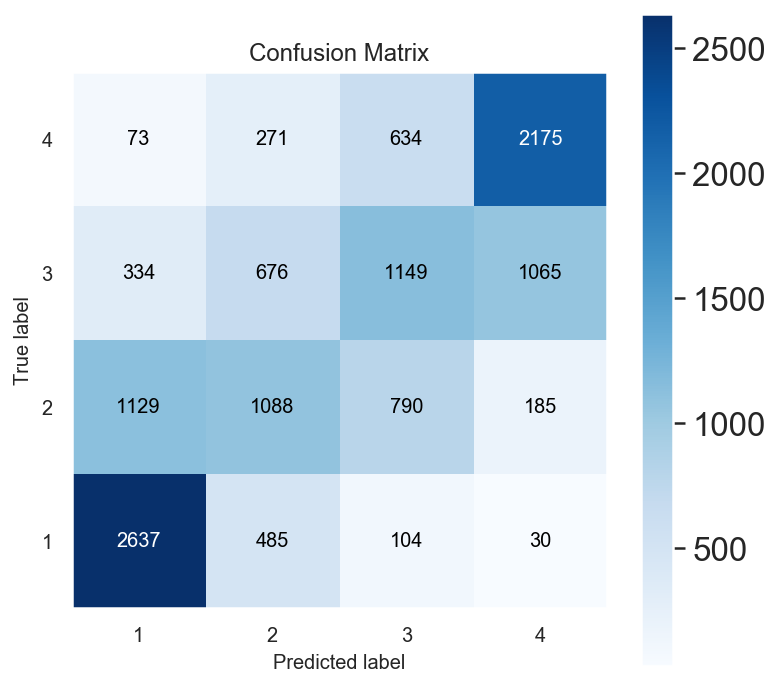

In [187]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(logreg.classes_)))
from sklearn.metrics import classification_report, confusion_matrix

predictions_train = logreg.predict(X_train)
predictions_test = logreg.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_train, predictions_train, figsize=(6,6))
plt.ylim([-0.5, len(y_train.unique())-0.5])
plt.show()

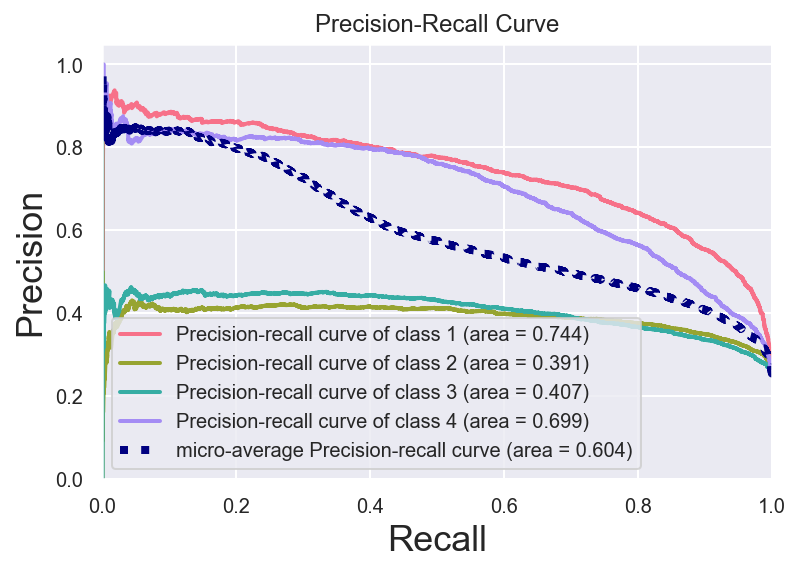

In [188]:
probabilities_train = logreg.predict_proba(X_train)
probabilities_test = logreg.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap);

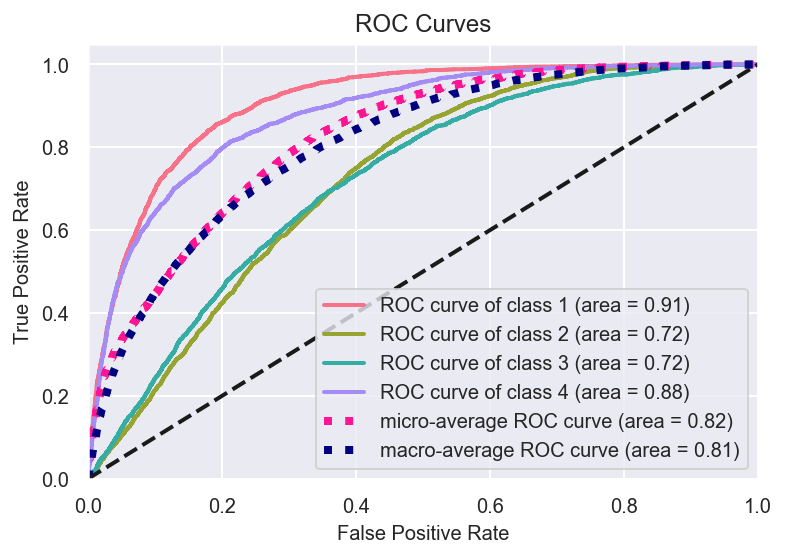

In [190]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.show()

# -----------------------------------------------------------------------------------------